<a href="https://colab.research.google.com/github/Johnsantos1989/alura-store-analise-vendas/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [3]:
faturamento_total_loja = loja["Preço"].sum()
faturamento_total_loja2 = loja2["Preço"].sum()
faturamento_total_loja3 = loja3["Preço"].sum()
faturamento_total_loja4 = loja4["Preço"].sum()

In [4]:
faturamento_total = pd.DataFrame({
    "Loja": ["Loja1", "Loja2", "Loja3", "Loja4"],
    "Faturamento Total (R$)": [
        loja["Preço"].sum(),
        loja2["Preço"].sum(),
        loja3["Preço"].sum(),
        loja4["Preço"].sum()
    ]
})

faturamento_total_formatado = faturamento_total.copy()
faturamento_total_formatado["Faturamento Total (R$)"] = faturamento_total_formatado["Faturamento Total (R$)"].map(
    lambda x: f"R$ {x:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")
)

display(faturamento_total_formatado)

,Loja,Faturamento Total (R$)
0,Loja1,"R$ 1.534.509,12"
1,Loja2,"R$ 1.488.459,06"
2,Loja3,"R$ 1.464.025,03"
3,Loja4,"R$ 1.384.497,58"


# 2. Vendas por Categoria

In [5]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja1", "Loja2", "Loja3", "Loja4"]

for df, nome in zip(lojas, nomes_lojas):
    quantidade_categoria = (
        df.groupby("Categoria do Produto")["Produto"]
        .count()
        .reset_index()
        .rename(columns={"Produto": "Quantidade Vendida"})
        .sort_values(by="Quantidade Vendida", ascending=False)
    )
    print(nome)
    display(quantidade_categoria)

Loja1


,Categoria do Produto,Quantidade Vendida
6,moveis,465
2,eletronicos,448
0,brinquedos,324
1,eletrodomesticos,312
3,esporte e lazer,284
4,instrumentos musicais,182
5,livros,173
7,utilidades domesticas,171


Loja2


,Categoria do Produto,Quantidade Vendida
6,moveis,442
2,eletronicos,422
0,brinquedos,313
1,eletrodomesticos,305
3,esporte e lazer,275
4,instrumentos musicais,224
5,livros,197
7,utilidades domesticas,181


Loja3


,Categoria do Produto,Quantidade Vendida
6,moveis,499
2,eletronicos,451
0,brinquedos,315
1,eletrodomesticos,278
3,esporte e lazer,277
5,livros,185
4,instrumentos musicais,177
7,utilidades domesticas,177


Loja4


,Categoria do Produto,Quantidade Vendida
6,moveis,480
2,eletronicos,451
0,brinquedos,338
3,esporte e lazer,277
1,eletrodomesticos,254
7,utilidades domesticas,201
5,livros,187
4,instrumentos musicais,170


# 3. Média de Avaliação das Lojas


In [6]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja1", "Loja2", "Loja3", "Loja4"]
medias = []

for i, df in enumerate(lojas, start=1):
  medias.append(df["Avaliação da compra"].mean())

media_avaliacoes = pd.DataFrame({
      "Loja": nomes_lojas,
      "Média de Avaliação": medias})
display(media_avaliacoes)

,Loja,Média de Avaliação
0,Loja1,3.976685
1,Loja2,4.037304
2,Loja3,4.048326
3,Loja4,3.995759


# 4. Produtos Mais e Menos Vendidos

In [7]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja1", "Loja2", "Loja3", "Loja4"]

resultados = []

for nome, df in zip(nomes_lojas, lojas):
    vendas_produto = df["Produto"].value_counts()
    produto_mais_vendido = vendas_produto.idxmax()
    qtd_mais_vendido = vendas_produto.max()
    produto_menos_vendido = vendas_produto.idxmin()
    qtd_menos_vendido = vendas_produto.min()

    resultados.append({
        "Loja": nome,
        "Produto Mais Vendido": f"{produto_mais_vendido} ({qtd_mais_vendido} vendas)",
        "Produto Menos Vendido": f"{produto_menos_vendido} ({qtd_menos_vendido} vendas)"
    })

tabela_resultados = pd.DataFrame(resultados)
tabela_resultados

,Loja,Produto Mais Vendido,Produto Menos Vendido
0,Loja1,Micro-ondas (60 vendas),Headset (33 vendas)
1,Loja2,Iniciando em programação (65 vendas),Jogo de tabuleiro (32 vendas)
2,Loja3,Kit banquetas (57 vendas),Blocos de montar (35 vendas)
3,Loja4,Cama box (62 vendas),Guitarra (33 vendas)


# 5. Frete Médio por Loja

In [8]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja1", "Loja2", "Loja3", "Loja4"]

custos_frete = []

for nome, df in zip(nomes_lojas, lojas):
    frete_medio = df["Frete"].mean()
    custos_frete.append({
        "Loja": nome,
        "Custo médio de frete (R$)": round(frete_medio, 2)
    })

tabela_frete = pd.DataFrame(custos_frete)
tabela_frete


,Loja,Custo médio de frete (R$)
0,Loja1,34.69
1,Loja2,33.62
2,Loja3,33.07
3,Loja4,31.28


# 6. Gerando grafico

### Gráfico de barras — Faturamento Total por Loja

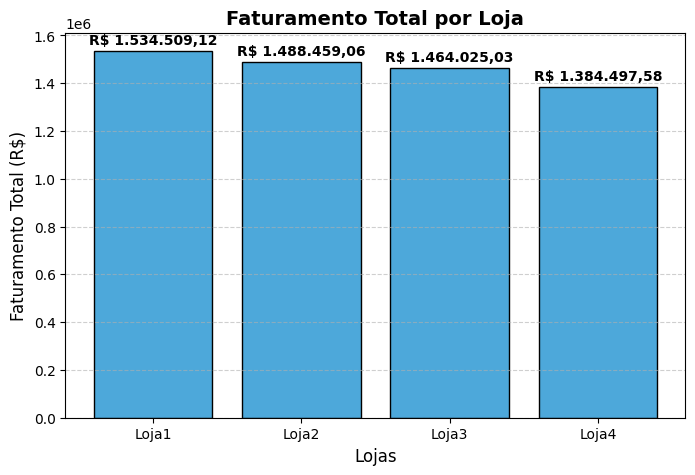

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(faturamento_total["Loja"],
        faturamento_total["Faturamento Total (R$)"],
        color="#4DA8DA", edgecolor="black")

plt.title("Faturamento Total por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Faturamento Total (R$)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Adicionei os valores encima das barras
for i, v in enumerate(faturamento_total["Faturamento Total (R$)"]):
    plt.text(i, v + (v * 0.01), f"R$ {v:,.2f}".replace(",", "v").replace(".", ",").replace("v", "."),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()



### Gráfico de linhas — Relação entre Quantidades Vendidas e Avaliação por Loja

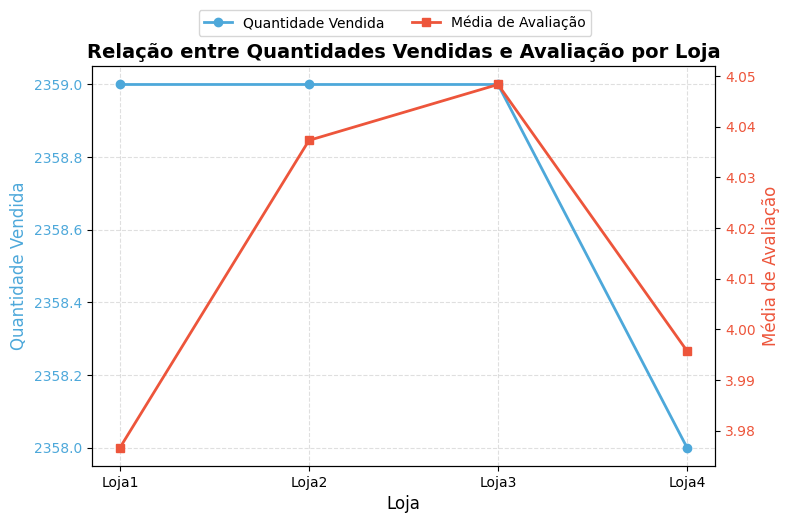

In [10]:
import matplotlib.pyplot as plt

lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja1", "Loja2", "Loja3", "Loja4"]

quantidades_vendidas = [len(df) for df in lojas]
avaliacoes_medias = [df["Avaliação da compra"].mean() for df in lojas]

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(nomes_lojas, quantidades_vendidas, color="#4DA8DA", marker="o", linewidth=2, label="Quantidade Vendida")
ax1.set_xlabel("Loja", fontsize=12)
ax1.set_ylabel("Quantidade Vendida", color="#4DA8DA", fontsize=12)
ax1.tick_params(axis='y', labelcolor="#4DA8DA")

ax2 = ax1.twinx()
ax2.plot(nomes_lojas, avaliacoes_medias, color="#ED553B", marker="s", linewidth=2, label="Média de Avaliação")
ax2.set_ylabel("Média de Avaliação", color="#ED553B", fontsize=12)
ax2.tick_params(axis='y', labelcolor="#ED553B")

plt.title("Relação entre Quantidades Vendidas e Avaliação por Loja", fontsize=14, fontweight="bold")
ax1.grid(True, linestyle="--", alpha=0.4)

fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=10)
plt.tight_layout()
plt.show()




### Gráfico de Rosca — Avaliação Média por Loja (em %)

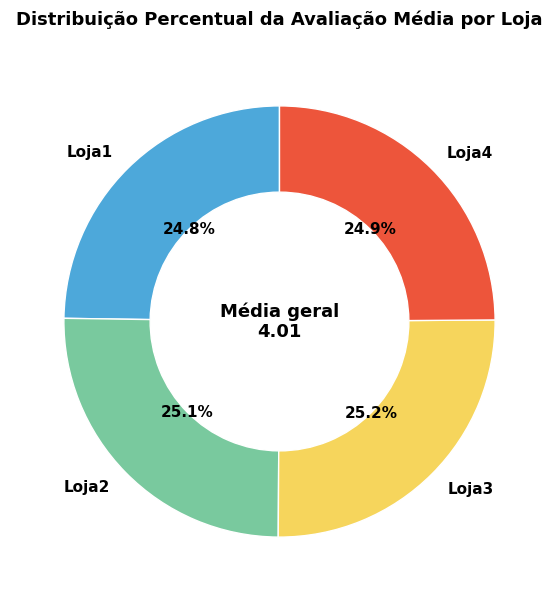

In [11]:
import matplotlib.pyplot as plt

total = media_avaliacoes["Média de Avaliação"].sum()
media_avaliacoes["Percentual"] = (media_avaliacoes["Média de Avaliação"] / total) * 100

media_geral = media_avaliacoes["Média de Avaliação"].mean()

cores = ["#4DA8DA", "#79C99E", "#F6D55C", "#ED553B"]

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    media_avaliacoes["Percentual"],
    labels=media_avaliacoes["Loja"],
    autopct="%.1f%%",
    startangle=90,
    colors=cores,
    wedgeprops={"width": 0.4, "edgecolor": "white"}
)

plt.setp(autotexts, size=11, weight="bold", color="black")
plt.setp(texts, size=11, weight="bold")

ax.text(0, 0, f"Média geral\n{media_geral:.2f}",
        ha='center', va='center', fontsize=13, fontweight='bold')

ax.set_title("Distribuição Percentual da Avaliação Média por Loja", fontsize=13, fontweight="bold", pad=20)

plt.show()


### Relatório Final

In [12]:
from IPython.display import Markdown, display

# Autor: John Lenon Nogueira

# Identificar lojas automaticamente
pior_loja = faturamento_total.loc[faturamento_total["Faturamento Total (R$)"].idxmin(), "Loja"]
melhor_loja = faturamento_total.loc[faturamento_total["Faturamento Total (R$)"].idxmax(), "Loja"]
melhor_avaliacao = media_avaliacoes.loc[media_avaliacoes["Média de Avaliação"].idxmax(), "Loja"]

# Texto em Markdown
relatorio_markdown = f"""
# 🧾 Relatório Final — Análise de Desempenho das Lojas do Senhor João

## 🟩 Introdução
O objetivo desta análise foi identificar qual das quatro lojas do Senhor João apresenta o **pior desempenho geral**,
para recomendar **qual deve ser vendida**. A decisão foi baseada em critérios **financeiros, operacionais e de satisfação do cliente**.

---

## 📊 Desenvolvimento da Análise
Foram avaliados os seguintes indicadores:
- 💰 Faturamento total de cada loja;
- 🛒 Categorias e produtos mais e menos vendidos;
- ⭐ Média das avaliações dos clientes;
- 🚚 Custo médio de frete;
- 📈 Relação entre quantidade vendida e avaliação média.

---

## 💰 Faturamento Total
A análise mostrou que **{melhor_loja}** teve o **maior faturamento total**, demonstrando excelente desempenho financeiro.
Por outro lado, **{pior_loja}** registrou o **menor faturamento** entre todas as lojas.

---

## ⭐ Avaliação Média dos Clientes
As avaliações das lojas ficaram próximas, com médias gerais em torno de **4,0**.
A **{melhor_avaliacao}** apresentou a **melhor média de avaliações**, indicando maior satisfação dos clientes.

---

## 🚚 Custo Médio de Frete
Os custos de frete variaram pouco entre as lojas (entre **R$ 31** e **R$ 35**).
Embora a diferença seja pequena, o frete mais baixo **não foi suficiente para impulsionar o desempenho da {pior_loja}**.

---

## 📈 Relação entre Quantidade Vendida e Avaliação
A análise visual mostrou que lojas com melhor faturamento também tendem a ter boas avaliações,
indicando equilíbrio entre **volume de vendas** e **satisfação do cliente**.

---

## 🟨 Conclusão e Recomendação
Com base nas análises, a recomendação é que o Senhor João **venda a {pior_loja}**.

### Principais motivos:
- 📉 Menor faturamento total, demonstrando desempenho financeiro inferior;
- 📦 Volume de vendas abaixo da média;
- ⚖️ Avaliações regulares, sem destaque positivo;
- 🚫 Baixo potencial de crescimento comparado às demais lojas.

As lojas **{melhor_loja}** e **{melhor_avaliacao}** se destacam positivamente — a primeira pelo alto faturamento
e a segunda pela melhor percepção dos clientes.

➡️ Dessa forma, vender a **{pior_loja}** é a decisão mais estratégica, permitindo que o Senhor João mantenha as lojas
com **maior potencial de lucro e satisfação dos clientes**.

---

## 🟪 Observação Final
Este relatório foi gerado automaticamente com base nas análises e gráficos produzidos,
proporcionando uma visão **clara e fundamentada** sobre o desempenho de cada loja.
"""

display(Markdown(relatorio_markdown))






# 🧾 Relatório Final — Análise de Desempenho das Lojas do Senhor João

## 🟩 Introdução
O objetivo desta análise foi identificar qual das quatro lojas do Senhor João apresenta o **pior desempenho geral**,
para recomendar **qual deve ser vendida**. A decisão foi baseada em critérios **financeiros, operacionais e de satisfação do cliente**.

---

## 📊 Desenvolvimento da Análise
Foram avaliados os seguintes indicadores:
- 💰 Faturamento total de cada loja;
- 🛒 Categorias e produtos mais e menos vendidos;
- ⭐ Média das avaliações dos clientes;
- 🚚 Custo médio de frete;
- 📈 Relação entre quantidade vendida e avaliação média.

---

## 💰 Faturamento Total
A análise mostrou que **Loja1** teve o **maior faturamento total**, demonstrando excelente desempenho financeiro.
Por outro lado, **Loja4** registrou o **menor faturamento** entre todas as lojas.

---

## ⭐ Avaliação Média dos Clientes
As avaliações das lojas ficaram próximas, com médias gerais em torno de **4,0**.
A **Loja3** apresentou a **melhor média de avaliações**, indicando maior satisfação dos clientes.

---

## 🚚 Custo Médio de Frete
Os custos de frete variaram pouco entre as lojas (entre **R$ 31** e **R$ 35**).
Embora a diferença seja pequena, o frete mais baixo **não foi suficiente para impulsionar o desempenho da Loja4**.

---

## 📈 Relação entre Quantidade Vendida e Avaliação
A análise visual mostrou que lojas com melhor faturamento também tendem a ter boas avaliações,
indicando equilíbrio entre **volume de vendas** e **satisfação do cliente**.

---

## 🟨 Conclusão e Recomendação
Com base nas análises, a recomendação é que o Senhor João **venda a Loja4**.

### Principais motivos:
- 📉 Menor faturamento total, demonstrando desempenho financeiro inferior;
- 📦 Volume de vendas abaixo da média;
- ⚖️ Avaliações regulares, sem destaque positivo;
- 🚫 Baixo potencial de crescimento comparado às demais lojas.

As lojas **Loja1** e **Loja3** se destacam positivamente — a primeira pelo alto faturamento
e a segunda pela melhor percepção dos clientes.

➡️ Dessa forma, vender a **Loja4** é a decisão mais estratégica, permitindo que o Senhor João mantenha as lojas
com **maior potencial de lucro e satisfação dos clientes**.

---

## 🟪 Observação Final
Este relatório foi gerado automaticamente com base nas análises e gráficos produzidos,
proporcionando uma visão **clara e fundamentada** sobre o desempenho de cada loja.


# 7. Extra!  Análise de Desempenho Geográfico

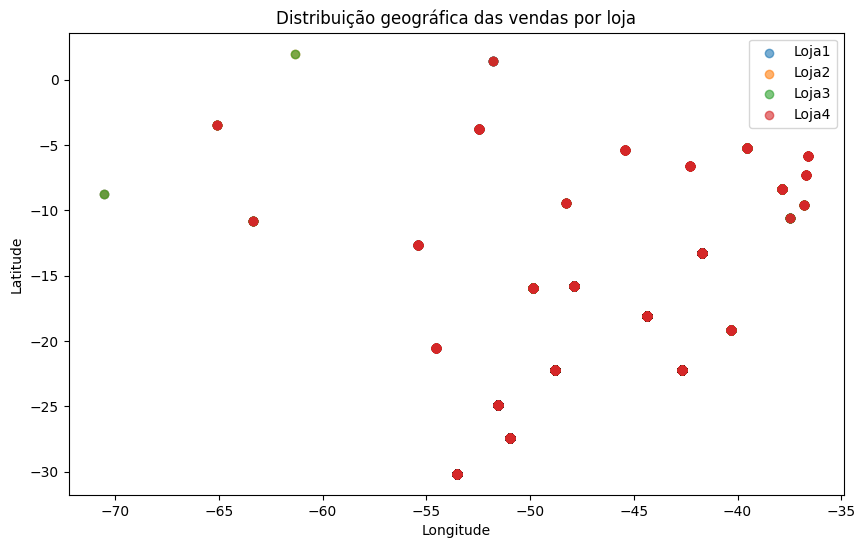

In [14]:
import matplotlib.pyplot as plt

lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja1", "Loja2", "Loja3", "Loja4"]

plt.figure(figsize=(10, 6))

for df, nome in zip(lojas, nomes_lojas):
    plt.scatter(df["lon"], df["lat"], label=nome, alpha=0.6)

plt.title("Distribuição geográfica das vendas por loja")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()
